In [1]:
#1
# Read data set

import pandas as pd

apps= pd.read_csv('apps.csv')

apps= apps.drop_duplicates()

# Print the total number of apps

print('Total number of apps in the dataset = ',  apps['App'].count())

# Print a concise summary of apps dataframe
apps. info()

# Have a look at a random sample of n=5 rows
# Use the sample(n) function to print a random sample of n rows.

apps.sample(n=5)


Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4729,5712,Ai-Ball AV Recorder,PHOTOGRAPHY,2.7,90,4.0,"5,000+",Paid,$2.99,Everyone,Photography,"October 19, 2017",13,2.3.3 and up
6908,7970,CV Templates 2018,FAMILY,4.0,13,26.0,"5,000+",Free,0,Everyone,Education,"October 9, 2017",1.1,4.0.3 and up
8205,9326,EG SIM CARD (EGSIMCARD),TRAVEL_AND_LOCAL,4.4,105,5.0,"10,000+",Free,0,Everyone,Travel & Local,"May 2, 2018",2.5,2.3 and up
4621,5592,My OldBoy! Free - GBC Emulator,GAME,4.2,51787,NaN,"5,000,000+",Free,0,Everyone,Arcade,"January 12, 2018",Varies with device,Varies with device
7017,8083,CY Security Antivirus Cleaner,PRODUCTIVITY,4.5,75140,NaN,"1,000,000+",Free,0,Everyone,Productivity,"January 2, 2018",Varies with device,Varies with device


In [2]:
# 2
# DATA CLEANING
## iNSTALLS AND PRICE COLUMNS ARE OBJECTS DUE SOME CARCTERS WE NEED TO CLEAN UP THE COLUMS

# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))    
    # Convert col to float data type
    apps[col] = apps[col].astype(float)

apps.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


Number of categories =  33
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


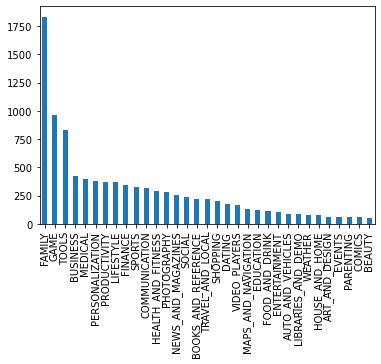

In [16]:
# 3 Exploring app categories 
# Create data for a bar chart that shows the distribution of apps across different categories.

num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)
## apps in category -values counted and sorted

num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

print(num_apps_in_category)

num_apps_in_category.plot.bar()

## importing plotly

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go


# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)




In [31]:
## Create a plot annotation for average app rating.

#Avarage app rating in avg_app_rating

avg_app_rating=apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

r = apps['Rating'].value_counts()

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


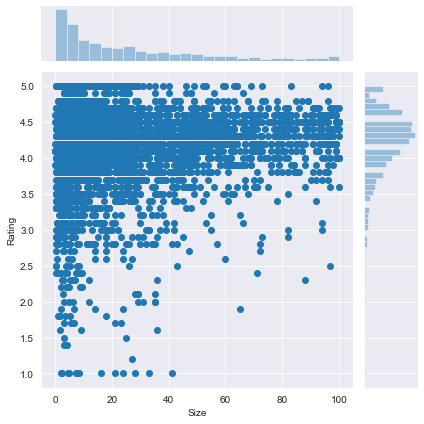

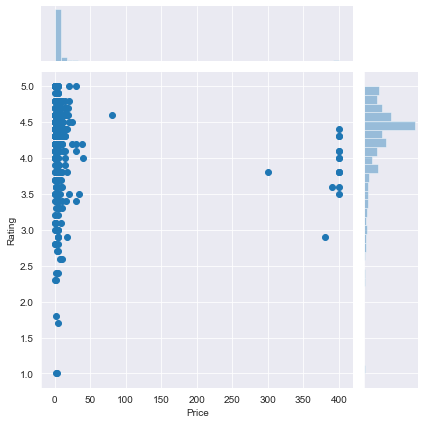

In [57]:
#Task 5

%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Examine the relationship between size, price, and rating of apps using jointplot().

#Isoloating data

apps.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#Select rows from apps where both Rating and Size values are present, ie - they are not null. Store the result in the apps_with_size_and_rating_present
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]


#From apps_with_size_and_rating_present, select the categories having atleast 250 apps. Assign the result to large_categories dataframe.


large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

#Fill out x and y to create a joint plot of Rating as a function of Size.

plt1=sns.jointplot(x= large_categories['Size'], y=large_categories['Rating'])


#From apps_with_size_and_rating_present dataframe, select all Paid apps. Save the result in paid_apps.

paid_apps=apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']== 'Paid']

##Fill out x and y to create a joint plot of Rating as a function of Price.

plt2=sns.jointplot(x=paid_apps['Price'], y=paid_apps['Rating'])


,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


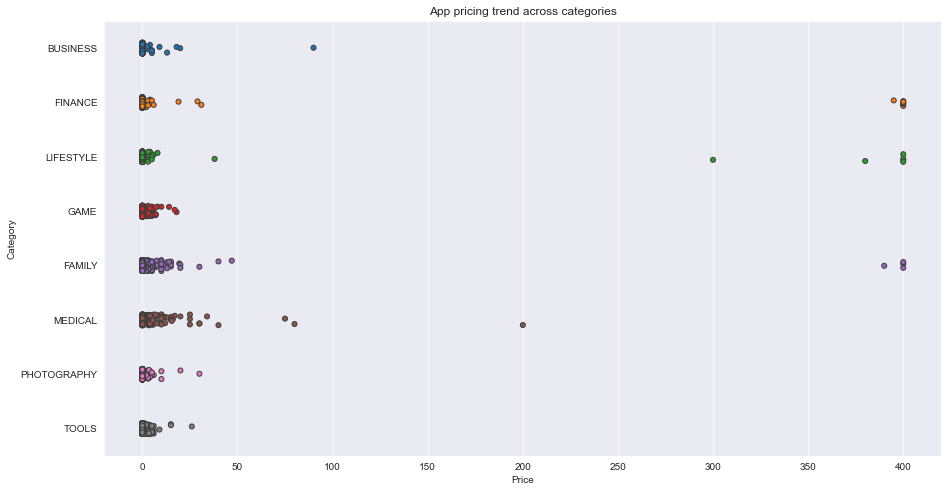

In [61]:
# Task 6


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'],data = popular_app_cats, jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

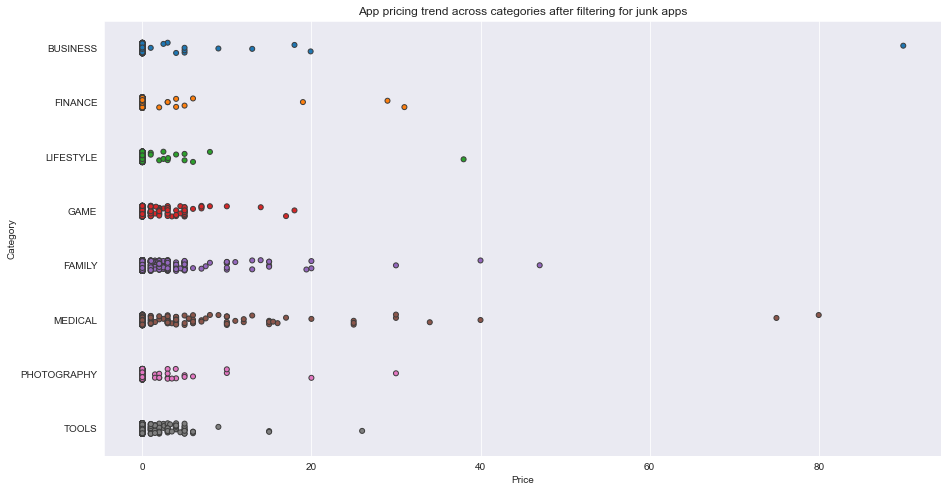

In [60]:
# Task 7

# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [62]:
# Task 8

#Prep the data for a box plot that compares the number of installs of paid apps vs. number of installs of free apps.


trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

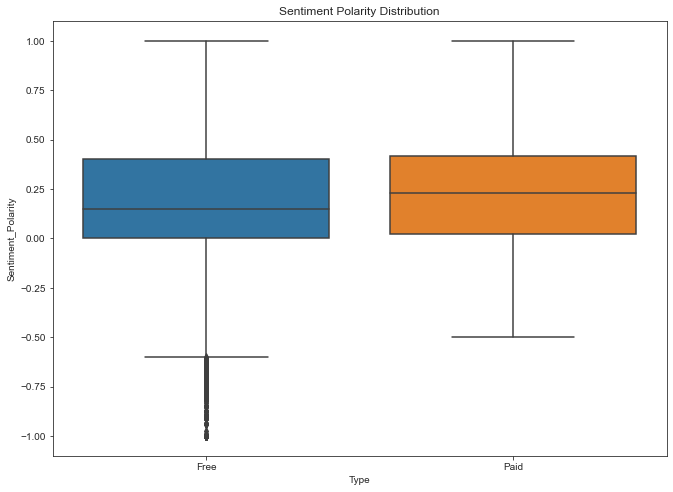

In [64]:
# Task 9
#Task 9: Load the user review data and plot it to visualize sentiment of paid vs. free apps.

#Read datasets/user_reviews.csv into the reviews_df DataFrame.
#Merge apps and reviews_df DataFrames and assign the result to merged_df.
#Create a box plot with Type on the x-axis and Sentiment_Polarity on the y-axis.


# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on = "App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')